In [1]:
import pandas as pd

car_data = pd.read_csv("./CarPrice_Assignment.csv")

# 去掉评估不相关数据，生成聚类分析专用表格

In [2]:
analysis_data = car_data.drop(["car_ID", "symboling", "CarName"], axis = 1)

# 将文本数据转化为可分析的数据

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
analysis_data["fueltype"] = le.fit_transform(analysis_data["fueltype"])
analysis_data["aspiration"] = le.fit_transform(analysis_data["aspiration"])
analysis_data["doornumber"] = le.fit_transform(analysis_data["doornumber"])
analysis_data["carbody"] = le.fit_transform(analysis_data["carbody"])
analysis_data["drivewheel"] = le.fit_transform(analysis_data["drivewheel"])
analysis_data["enginelocation"] = le.fit_transform(analysis_data["enginelocation"])
analysis_data["enginetype"] = le.fit_transform(analysis_data["enginetype"])
analysis_data["cylindernumber"] = le.fit_transform(analysis_data["cylindernumber"])
analysis_data["fuelsystem"] = le.fit_transform(analysis_data["fuelsystem"])

# 规范到[0, 1]空间

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
analysis_data = min_max_scaler.fit_transform(analysis_data)

# 判断簇数量的最优值

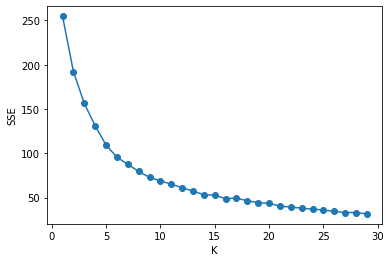

In [5]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(analysis_data)
    sse.append(kmeans.inertia_)

import matplotlib.pyplot as plt
x = range(1, 30)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

# 选定16为最优数，生成聚类结果

In [6]:
kmeans = KMeans(n_clusters = 16)
kmeans.fit(analysis_data)
predict_y = kmeans.predict(analysis_data)
print(predict_y)

[ 6  6  6  1  1  2  1  1 14  4  6  7  6 12 12 12 15 13  5  5  9  5  5  4
  9  9  9  4  0  4  5  5  5  5  5  9  9  5  5  9  9  1  5  0  5  9  6 12
 12 15  5  5  5  9  9 11 11 11 11  5  0  5  0 10  0  7 10  8  8  8  8 13
 15 13 15  4  5  5  5  4  4  5  4  4  4  0  0 14  1  5 10  5  9  9  5  5
  9  9  5  0  0  1  1  1  6  4  6  7  8  7  8  7  8  7  8  7  8 14  5  4
  9  9  9  0  4  6 15 15 15 15  1  2  2  1  2  1  4 14  5  5  5  0  0  1
  0 14  0  1  0 14  5  5  9  0  0  0  9  9 10 10  9  9  9  5  5  6  6  6
  6  6  6  6  6  1  3  1  1  1  6  6 12 12 10  2 10  1  1  3  1  2  2  1
  3  1  7  7  7  7 14 14  7 14  7  8 14]


In [7]:
result = pd.DataFrame(car_data).join(pd.DataFrame(predict_y))
result.rename({0:u"KMeansResult"}, axis = 1, inplace = True)
print(result)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

# 输出每一个聚类的竞品车型

In [8]:
for i in range(1, 16):
    print("*" * 50)
    print("Type %d Cars:" %i)
    print(result[result.KMeansResult == i]["CarName"])

**************************************************
Type 1 Cars:
3               audi 100 ls
4                audi 100ls
6                audi 100ls
7                 audi 5000
41              honda civic
88     mitsubishi mirage g4
101             nissan dayz
102             nissan fuga
103             nissan otti
130            renault 12tl
133               saab 99le
135              saab 99gle
143             subaru baja
147          subaru tribeca
173          toyota corolla
175           toyota corona
176          toyota corolla
177          toyota mark ii
185       volkswagen type 3
186     volkswagen 411 (sw)
188       volkswagen dasher
191       volkswagen rabbit
193       volkswagen dasher
Name: CarName, dtype: object
**************************************************
Type 2 Cars:
5                          audi fox
131                   renault 5 gtl
132                        saab 99e
134                       saab 99le
183    volkswagen 1131 deluxe sedan
189                